# Investigation of mussel spat settlement in Southwest England 

Author: Amy Zyck

Last Updated: Dec. 19, 2019

## Background 

This data describes juvenile mussel (spat) settlement throughout the summer months in Southwest England. Marine mussels have a sessile adult stage making them entirely dependent on their pelagic larval stage for long-distance dispersal and gene flow across populations. These larvae will exist in the water column for several weeks before settling on clumps of algae in the intertidal zone onshore. The mussel spat will continue to grow and development on the algae before their final settlement onto rocks in the intertidal zone. High levels of spat settlement will occur throughout the summer months, with a larger settlement event in the beginning of the summer, followed by several smaller settlement events throughout the remaining summer months. 

Clumps of red algae were collected by Dr. Jerry Hilbish from 5 intertidal sites in Southwest England every few days between April and September of 2012. Algal clumps were preserved in ethanol and brought back to the University of South Carolina for processing. For each collected algal clump, settled spat were removed, measured, checked for an eyespot, and then preserved for further genetic analysis. Each row in the data set corresponds to an individual mussel spat sample. Algal clumps were weighed before and after spat were removed to obtain dry weight measurements for density calculations. Sample processing was completed by various lab members in the Hilbish lab, including myself. 

The variables relevant to the settement analysis include the Individuals (settled spat), the Site (from which they were sampled), the Algae weight (for calculating settlement density), Eyespot (presence or absence), the spat Size (mm), and the Julian_Day (collection date). The spat size (mm) was calculated taking into consideration the OMU Size and Microscope Magnification used during measurement. 

## Data Processing 

In [1]:
#Loading necessary packages for all steps of analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats #to run t-test

%matplotlib notebook

### Loading, Cleaning, and Preparing Data

I loaded in the dataset twice as a .csv file. For both, the file path is dependent on where the file is saved - the path below will not work for anyone else. First, the dataset is read in its entirety - this data will be used on most anlyses. 

In [2]:
#load a csv.
MSC = pd.read_csv('/Users/azyck/Documents/Fall_2019_Classes/CSC593/MusselSpat_2012.csv')
MSC.head()

,Individual,Site,Date_Collected,Date_Processed,Algal_clump,Algae_wt_(g),Eyespot,OMU_size,Magnification,Scope,Initials,Size,Julian_Day
0,DD_10Jun12_1,DD,10-Jun-12,29-Jun-14,2,NaN,1.0,28.0,4.0,H,NM,0.700,162
1,DD_10Jun12_2,DD,10-Jun-12,29-Jun-14,3,NaN,1.0,32.0,4.0,H,NM,0.800,162
2,DD_23Jun12_1,DD,23-Jun-12,1-Jul-14,1,NaN,1.0,33.0,4.0,H,NM,0.825,175
3,DD_23Jun12_10,DD,23-Jun-12,1-Jul-14,5,NaN,1.0,30.0,4.0,H,NM,0.750,175
4,DD_23Jun12_2,DD,23-Jun-12,1-Jul-14,1,NaN,1.0,30.0,4.0,H,NM,0.750,175


Second, the dataset is read in again, but this time any samples missing data in the Algal_wt_(g) column are removed. This dataset will be used when calculating density to determine spat settlement. 

In [3]:
#load a csv.
spat_data = pd.read_csv('/Users/azyck/Documents/Fall_2019_Classes/CSC593/MusselSpat_2012.csv').dropna(subset = ['Algae_wt_(g)']) #loading dataset and dropping samples with NaN (missing data) in the Algal_wt_(g) column
spat_data.head()

,Individual,Site,Date_Collected,Date_Processed,Algal_clump,Algae_wt_(g),Eyespot,OMU_size,Magnification,Scope,Initials,Size,Julian_Day
507,PW_28May12_1,PW,28-May-12,17-Jul-14,1,0.0375,1.0,21.0,4.0,H,NM,0.525,149
508,PW_28May12_2,PW,28-May-12,17-Jul-14,1,0.0375,1.0,26.0,4.0,H,NM,0.650,149
509,PW_28May12_3,PW,28-May-12,17-Jul-14,1,0.0375,1.0,20.0,4.0,H,NM,0.500,149
510,PW_28May12_4,PW,28-May-12,17-Jul-14,1,0.0375,1.0,25.0,4.0,H,NM,0.625,149
511,PW_28May12_5,PW,28-May-12,17-Jul-14,1,0.0375,1.0,20.0,4.0,H,NM,0.500,149


For both datasets, any other missing values are replaced with zeros, and still included in analyses. 

In [4]:
#replace missing values with zeros.
MSC.fillna(0)

,Individual,Site,Date_Collected,Date_Processed,Algal_clump,Algae_wt_(g),Eyespot,OMU_size,Magnification,Scope,Initials,Size,Julian_Day
0,DD_10Jun12_1,DD,10-Jun-12,29-Jun-14,2,0.0000,1.0,28.0,4.0,H,NM,0.700,162
1,DD_10Jun12_2,DD,10-Jun-12,29-Jun-14,3,0.0000,1.0,32.0,4.0,H,NM,0.800,162
2,DD_23Jun12_1,DD,23-Jun-12,1-Jul-14,1,0.0000,1.0,33.0,4.0,H,NM,0.825,175
3,DD_23Jun12_10,DD,23-Jun-12,1-Jul-14,5,0.0000,1.0,30.0,4.0,H,NM,0.750,175
4,DD_23Jun12_2,DD,23-Jun-12,1-Jul-14,1,0.0000,1.0,30.0,4.0,H,NM,0.750,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,SH_20Aug12_50,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,91.0,2.5,H,AB,4.550,233
8716,SH_20Aug12_193,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,95.0,2.5,H,AB,4.750,233
8717,SH_20Aug12_201,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,99.0,2.0,H,AB,4.950,233
8718,SH_20Aug12_116,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,100.0,2.0,H,AB,5.000,233


In [5]:
#replace missing values with zeros.
spat_data.fillna(0)

,Individual,Site,Date_Collected,Date_Processed,Algal_clump,Algae_wt_(g),Eyespot,OMU_size,Magnification,Scope,Initials,Size,Julian_Day
507,PW_28May12_1,PW,28-May-12,17-Jul-14,1,0.0375,1.0,21.0,4.0,H,NM,0.525,149
508,PW_28May12_2,PW,28-May-12,17-Jul-14,1,0.0375,1.0,26.0,4.0,H,NM,0.650,149
509,PW_28May12_3,PW,28-May-12,17-Jul-14,1,0.0375,1.0,20.0,4.0,H,NM,0.500,149
510,PW_28May12_4,PW,28-May-12,17-Jul-14,1,0.0375,1.0,25.0,4.0,H,NM,0.625,149
511,PW_28May12_5,PW,28-May-12,17-Jul-14,1,0.0375,1.0,20.0,4.0,H,NM,0.500,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,SH_20Aug12_50,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,91.0,2.5,H,AB,4.550,233
8716,SH_20Aug12_193,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,95.0,2.5,H,AB,4.750,233
8717,SH_20Aug12_201,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,99.0,2.0,H,AB,4.950,233
8718,SH_20Aug12_116,SH,20-Aug-12,29-Jan-16,4,0.0518,0.0,100.0,2.0,H,AB,5.000,233


Certain parts of the MSC dataset are then classified into bins, which will be used in further analyses. These bins are added to the dataset as new columns.

In [6]:
#Binning settlement days into 3 categories: Early-Summer, Mid-Summer, Late-Summer
bins = [120, 160, 200, 365] #setting the boundaries for each bin: 120-159 = Early-Summer; 160-199 = Mid-Summer; 200-365 = Late-Summer
MSC['Summer_Summary'] = pd.cut(MSC.Julian_Day, bins, 
                         labels=['Early-Summer', 'Mid-Summer', 
                                 'Late-Summer']) #Creating new column "Summer_Summary" with the new classifications

Re-do this for the spat_data

In [7]:
#Binning settlement days into 3 categories: Early-Summer, Mid-Summer, Late-Summer
bins = [120, 160, 200, 365] #setting the boundaries for each bin: 120-159 = Early-Summer; 160-199 = Mid-Summer; 200-365 = Late-Summer
spat_data['Summer_Summary'] = pd.cut(spat_data.Julian_Day, bins, 
                         labels=['Early-Summer', 'Mid-Summer', 
                                 'Late-Summer']) #Creating new column "Summer_Summary" with the new classifications

In [8]:
#Binning the spat sizes into 4 size classes
bins1 = [0, 0.75 , 1.5, 3, 10] #setting the boundaries for each bin: 0-0.749 = Small; 0.75-1.49 = Medium; 1.5-2.99 = Large; 3-10 = Late Juvenile
MSC['Size_Class'] = pd.cut(MSC.Size, bins1, 
                         labels=['Small', 'Medium', 
                                 'Large','Late Juvenile']) #Creating new column "Size_Class" with new size classifications

In [9]:
#Classifying the "age" of the settled spat based on the presence or absence of an eyespot 
bins2 = [-1, 0.5, 1] #set boundaries for each bin: -1-0.49 = Recently settled spat (no eyespot); 0.5-1 = Settled over 5 days ago (eyespot)
MSC['Spat_Age'] = pd.cut(MSC.Eyespot, bins2, 
                         labels=['Recently settled spat', 'Settled over 5 days ago']) #Creating new column "Spat_Age"

Both cleaned and prepared datasets are then saved as new files, with changed names so they are kept separate from the original file. Again, I have included the file path for my computer, this will need to be changed to the designated file path of your choosing. 

In [10]:
#Save your file (change the name if necessary).
MSC.to_csv('/Users/azyck/Documents/Fall_2019_Classes/CSC593/MusselSpat_complete.csv')

In [11]:
#Save your file (change the name if necessary).
spat_data.to_csv('/Users/azyck/Documents/Fall_2019_Classes/CSC593/MusselSpat_clean.csv')

### Analysis

#### 1. How does the timing of mussel spat settlement vary across sites in Southwest England? 

While we know settlement is occurring continously over the duration of the summer, there are likely large settlement events. There can either be one large settlement event or mutliple, which can be site dependent. 

To determine how many spat recently settled on an algal clump, density needs to be calculated. This is done by taking each algal clump, per date, per site and counting the number of spat that are under 0.375 mm, as these are spat that settled within 4-5 days. That number is then divided by the weight of the algal clump. Calculating recently settled spat reveals periods of the summer where large settlement events occurred. This gives us an idea of optimal settlement times and also reveals additional settlement events at different points in the summer.  

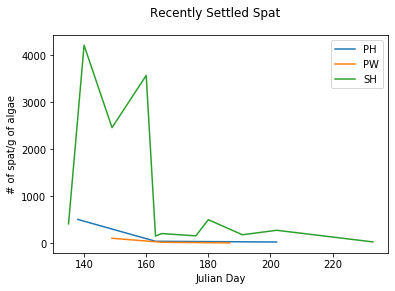

In [12]:
#calculating recent settlement for each date across each site
for site in np.unique(spat_data.Site):
    site_data = spat_data.loc[spat_data['Site'] == site] #locating the 5 sampling sites in the dataset
    collection_dates = np.unique(site_data.Julian_Day) #returning unique dates for each site
    date_densities = []
    for date in collection_dates:
        date_data = site_data.loc[site_data['Julian_Day'] == date] #within each date (within each site)
        clump_densities = []
        for clump in np.unique(date_data['Algal_clump']):
            clump_data = date_data.loc[date_data['Algal_clump'] == clump] #Sorting by Algal # within each date
            recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
            recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
            num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
            settlement_density = num_recent_settlers/np.unique(clump_data['Algae_wt_(g)'])[0] #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump
            clump_densities.append(settlement_density)
        avg_clump_density = np.mean(clump_densities) #calculating the average density of settlers on algal clumps 
        date_densities.append(avg_clump_density)
    plt.plot(collection_dates, date_densities, label = site) #plotting mean sizes (y) over time (x)
    plt.suptitle('Recently Settled Spat') #Setting a title
    plt.xlabel('Julian Day') # x-axis label
    plt.ylabel('# of spat/g of algae') # y-axis label
    plt.legend() # adding a legend

Across all 3 sites, peak settlement occurs at the end of May to early June. At site SH, there appears to be a second, smaller peak in settlement at the end of June. 

To compare the number of recent settlers between sites SH and PH and determine if there is a significant difference in recent settlement between the two sites, we calculated density as we did above, but for a single date shared by the two sites. In this case, we chose date 140 for site SH and date 138 for PH as they were the closest sampling dates within the peak settlement for both sites. The `spat_data` set is separated into one dataset of just site SH and just date 140; and a second dataset of just site PH and just date 138. The average density for each algal clump (1-5) is calculated for both datasets. 

In [13]:
#Filtering the dataframe based on Site SH
is_SH =  spat_data['Site']=="SH"
spat_SH = spat_data[is_SH] #Filtering dataset using boolean variable 

In [14]:
#Filtering the SH dataset to just select for date 140 
jd_140 =  spat_SH['Julian_Day']==140
SH_140 = spat_SH[jd_140]

In [15]:
#Filtering the SH dataset for date 140 by each algal clump 
clump1 = SH_140['Algal_clump']==1
SH_algae1 = SH_140[clump1]

clump2 = SH_140['Algal_clump']==2
SH_algae2 = SH_140[clump2]

clump3 = SH_140['Algal_clump']==3
SH_algae3 = SH_140[clump3]

clump4 = SH_140['Algal_clump']==4
SH_algae4 = SH_140[clump4]

clump5 = SH_140['Algal_clump']==5
SH_algae5 = SH_140[clump5]

In [16]:
#Calculating the density of algal clump #1 at Site SH on Day 140 
for clump in np.unique(SH_algae1.Algal_clump): #Finding the unique algal clumps 
    clump_data = SH_algae1.loc[SH_algae1['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_SH1 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [17]:
#Calculating the density of algal clump #2 at Site SH on Day 140 
for clump in np.unique(SH_algae2.Algal_clump): #Finding the unique algal clumps 
    clump_data = SH_algae2.loc[SH_algae2['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_SH2 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [18]:
#Calculating the density of algal clump #3 at Site SH on Day 140 
for clump in np.unique(SH_algae3.Algal_clump): #Finding the unique algal clumps 
    clump_data = SH_algae3.loc[SH_algae3['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_SH3 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [19]:
#Calculating the density of algal clump #4 at Site SH on Day 140 
for clump in np.unique(SH_algae4.Algal_clump): #Finding the unique algal clumps 
    clump_data = SH_algae4.loc[SH_algae4['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_SH4 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [20]:
#Calculating the density of algal clump #5 at Site SH on Day 140 
for clump in np.unique(SH_algae5.Algal_clump): #Finding the unique algal clumps 
    clump_data = SH_algae5.loc[SH_algae5['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_SH5 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [21]:
#calculating mean value for clumps 1 - 5
avg_density_SH1 = np.mean(settlement_density_SH1)

avg_density_SH2 = np.mean(settlement_density_SH2)

avg_density_SH3 = np.mean(settlement_density_SH3)

avg_density_SH4 = np.mean(settlement_density_SH4)

avg_density_SH5 = np.mean(settlement_density_SH5)

In [22]:
#Creating an array of average density values for all 5 clumps
settlement_density_SH = (avg_density_SH1, avg_density_SH2, avg_density_SH3, avg_density_SH4, avg_density_SH5)

settlement_density_SH

(3012.0481927710844,
 5000.0,
 4081.6326530612264,
 1707.317073170732,
 7258.064516129031)

Next, we calculated the average density of recently settled spat on algal clumps 1-5 for day 138 at site PH. Day 138 is the closest sampling date to 140. 

In [23]:
#Filtering the dataframe based on Site PH
is_PH =  spat_data['Site']=="PH"
spat_PH = spat_data[is_PH] #Filtering dataset using boolean variable 

In [24]:
#Filtering the PH dataset to just select for date 138 
jd_138 =  spat_PH['Julian_Day']==138
PH_138 = spat_PH[jd_138]

In [25]:
#Filtering the PH dataset for date 138 by each algal clump 
clump1 = PH_138['Algal_clump']==1
PH_algae1 = PH_138[clump1]

clump2 = PH_138['Algal_clump']==2
PH_algae2 = PH_138[clump2]

clump3 = PH_138['Algal_clump']==3
PH_algae3 = PH_138[clump3]

clump4 = PH_138['Algal_clump']==4
PH_algae4 = PH_138[clump4]

clump5 = PH_138['Algal_clump']==5
PH_algae5 = PH_138[clump5]

In [26]:
#Calculating the density of algal clump #1 at Site PH on Day 138
for clump in np.unique(PH_algae1.Algal_clump): #Finding the unique algal clumps 
    clump_data = PH_algae1.loc[PH_algae1['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_PH1 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [27]:
#Calculating the density of algal clump #2 at Site PH on Day 138
for clump in np.unique(PH_algae2.Algal_clump): #Finding the unique algal clumps 
    clump_data = PH_algae2.loc[PH_algae2['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_PH2 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [28]:
#Calculating the density of algal clump #3 at Site PH on Day 138
for clump in np.unique(PH_algae3.Algal_clump): #Finding the unique algal clumps 
    clump_data = PH_algae3.loc[PH_algae3['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_PH3 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [29]:
#Calculating the density of algal clump #4 at Site PH on Day 138
for clump in np.unique(PH_algae4.Algal_clump): #Finding the unique algal clumps 
    clump_data = PH_algae4.loc[PH_algae4['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_PH4 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [30]:
#Calculating the density of algal clump #5 at Site PH on Day 138
for clump in np.unique(PH_algae5.Algal_clump): #Finding the unique algal clumps 
    clump_data = PH_algae5.loc[PH_algae5['Algal_clump'] == clump]
    recent_settler_thresh = 0.375 #Creating a threshold for the max size that counts as a recently settled spat
    recent_settlers = clump_data.loc[clump_data['Size'] <= recent_settler_thresh] #assigning that threshold to the sorted data
    num_recent_settlers = len(recent_settlers) #assigning the number of recent settlers per algal clump to a new variable to calculate density
    settlement_density_PH5 = num_recent_settlers/(clump_data['Algae_wt_(g)']) #Calculating density as the number of recent settlers / the weight (g) of the specific Algal clump

In [31]:
#calculating mean value for clumps 1 - 5
avg_density_PH1 = np.mean(settlement_density_PH1)

avg_density_PH2 = np.mean(settlement_density_PH2)

avg_density_PH3 = np.mean(settlement_density_PH3)

avg_density_PH4 = np.mean(settlement_density_PH4)

avg_density_PH5 = np.mean(settlement_density_PH5)

In [32]:
#Creating an array of average density values for all 5 clumps
settlement_density_PH = (avg_density_PH1, avg_density_PH2, avg_density_PH3, avg_density_PH4, avg_density_PH5)

settlement_density_PH

(0.0, 410.15625, 880.5031446540885, 780.4878048780486, 430.10752688172045)

We then ran a t-test to test if we reject or fail to reject our null hypothesis:

Null: There is no significant difference in the density of early spat settlers during peak settlement periods between sites SH and PH. 

Steps to run the t-test come from: [SciPy.org](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html).

In [33]:
stats.ttest_ind(settlement_density_SH, settlement_density_PH)

Ttest_indResult(statistic=3.8997640038819266, pvalue=0.0045461659021324334)

There is a significant difference in the density of early spat settlers between sites SH and PH. SH has significantly higher settlement than PH. 

#### 2. How does the size of settled mussel spat change over the duration of the summer across sites?

As the summer progresses, both the spat settled on the algae as well as the larvae in the water column are growing in size because the number of phytoplankton (food) in the water is increasing. The rate of growth is dependent on the concentration of phytoplankton in the water. Some sites might exhibit slower growth rates if fewer phytoplankton are available or vice versa.  

To answer this question, the mean size at each date for each location needs to be calculated. This is completed using the `np.mean` function. Before calculating the mean size, the data has to first be filtered by site, because we want the mean size per date to be site specific. Then we filter the site specific data by Julian Day, to calculate the mean size value for each Julian Day. This calculation is first completed for all 5 sites in the dataset. 

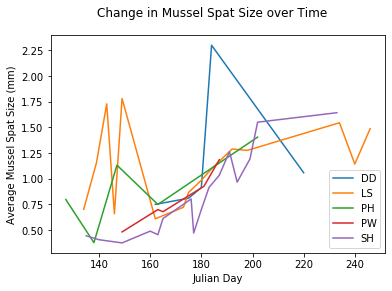

In [34]:
#calculating the average size (mm) for each date across each site
for site in np.unique(MSC.Site):
    site_data = MSC.loc[MSC['Site'] == site] #locating the 5 sampling sites in the dataset
    collection_dates = np.unique(site_data.Julian_Day) #returning unique dates for each site 
    site_sizes = []
    for date in collection_dates:
        date_data = site_data.loc[site_data['Julian_Day'] == date]
        avg_date_size = np.mean(date_data.Size) #calculating the mean size for each date across all sites
        site_sizes.append(avg_date_size)
    plt.plot(collection_dates, site_sizes, label = site) #plotting mean sizes (y) over time (x)
    plt.suptitle('Change in Mussel Spat Size over Time') #Setting a title
    plt.xlabel('Julian Day') # x-axis label
    plt.ylabel('Average Mussel Spat Size (mm)') # y-axis label
    plt.legend() # adding a legend 

All 5 sites show an increase in average mussel spat size as the summer progresses. Sites DD and LS have several large peaks and the beginning (LS) and end (DD) of the summer. Mussel spat from SH, PH, and PW have a fairly steady  growth rate throughout the summer. 

Next, growth throughout the summer was observed for just SH, PH, and PW as these were the 3 sites included in the _Recently Settled Spat_ analysis. This was also a better was to look at the trend in growth, as these 3 sites did not have outlier peaks like DD and LS did. Steps for completing this were the same as above, just on the 'spat_data' file.  

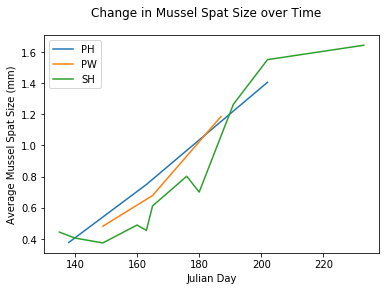

In [35]:
#calculating the average size (mm) for each date across each site
for site in np.unique(spat_data.Site):
    site_data = spat_data.loc[spat_data['Site'] == site] #locating the 5 sampling sites in the dataset
    collection_dates = np.unique(site_data.Julian_Day) #returning unique dates for each site 
    site_sizes = []
    for date in collection_dates:
        date_data = site_data.loc[site_data['Julian_Day'] == date]
        avg_date_size = np.mean(date_data.Size) #calculating the mean size for each date across all sites
        site_sizes.append(avg_date_size)
    plt.plot(collection_dates, site_sizes, label = site) #plotting mean sizes (y) over time (x)
    plt.suptitle('Change in Mussel Spat Size over Time') #Setting a title
    plt.xlabel('Julian Day') # x-axis label
    plt.ylabel('Average Mussel Spat Size (mm)') # y-axis label
    plt.legend() # adding a legend 

There is a very clear increase in spat size throughout the summer across these 3 sites.

As site SH has sampled dates throughout the full duration of the summer, we looked at the relationship between average spat size and Julian day a little bit closer. This involved singling out the SH site and calculating the average size for each date. Ordinary Least Squares Regression was run to observe the relationship between size and date (Julian Day). 

In [36]:
#Filtering the dataframe based on Site SH
is_SH =  MSC['Site']=="SH"
print(is_SH.head()) #looking at results as a boolean variable

0    False
1    False
2    False
3    False
4    False
Name: Site, dtype: bool


In [37]:
MSC_SH = MSC[is_SH] #Filtering dataset using boolean variable 
print(MSC_SH.shape) #checking the size of the data frame 

(5553, 16)


In [38]:
print(MSC_SH.head())

         Individual Site Date_Collected Date_Processed  Algal_clump  \
3167  SH_14May12_23   SH      14-May-12       6-Mar-14            1   
3168   SH_14May12_5   SH      14-May-12       6-Mar-14            1   
3169   SH_14May12_8   SH      14-May-12       6-Mar-14            1   
3170  SH_14May12_11   SH      14-May-12       6-Mar-14            1   
3171  SH_14May12_32   SH      14-May-12       6-Mar-14            1   

      Algae_wt_(g)  Eyespot  OMU_size  Magnification Scope Initials   Size  \
3167        0.0313      1.0      11.0            4.0     H       GP  0.275   
3168        0.0313      1.0      12.0            4.0     H       GP  0.300   
3169        0.0313      1.0      12.0            4.0     H       GP  0.300   
3170        0.0313      1.0      12.0            4.0     H       GP  0.300   
3171        0.0313      1.0      12.0            4.0     H       GP  0.300   

      Julian_Day Summer_Summary Size_Class                 Spat_Age  
3167         135   Early-Summer   

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


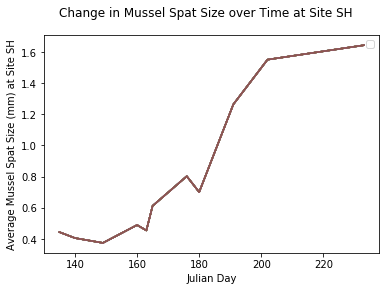

In [39]:
#calculating the average size (mm) for each date at site SH
for date in np.unique(MSC_SH.Julian_Day): #Finding the unique date values in the Julian Day column 
    date_data = MSC_SH.loc[MSC_SH['Julian_Day'] == date]
    avg_date_size = np.mean(date_data.Size) #calculating the mean size for each date 
    plt.plot(collection_dates, site_sizes) #plotting mean sizes (y) over time (x)
    plt.suptitle('Change in Mussel Spat Size over Time at Site SH') #Setting a title
    plt.xlabel('Julian Day') # x-axis label
    plt.ylabel('Average Mussel Spat Size (mm) at Site SH') # y-axis label
    plt.legend() # adding a legend

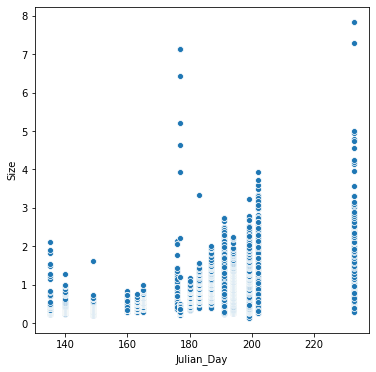

In [40]:
plt.figure(figsize=(6,6))
sns.scatterplot('Julian_Day', 'Size', data=MSC_SH)
plt.show()

In [41]:
#add_constant takes the slice of the dataframe and adds an extra column in front of it of constants - becomes the intercept
x = sm.add_constant(MSC_SH[['Julian_Day']])
y = MSC_SH.Size

#Linear Model 
lm = sm.OLS(y, x).fit()

# Residual Sum of Squares
RSS = sum(lm.resid ** 2)

# Total Sum of Squares
TSS = sum((MSC_SH.Size - np.mean(MSC_SH.Size)) ** 2)
R2 = 1 - (RSS/TSS)

#print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lm.summary()

/Users/azyck/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Size   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2580.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:52:50   Log-Likelihood:                -3950.9
No. Observations:                5553   AIC:                             7906.
Df Residuals:                    5551   BIC:                             7919.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0665      0.059    -35.073      0.000      -2.182      -1.951
Julian_Day     0.0164      0.000     50.789      0.000       0.016       0.017
==============================================================================
Omnibus:                     3722.884   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142435.054
Skew:                           2.684   Prob(JB):                         0.00
Kurtosis:                      27.224   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Size(Julian Day) = -2.0665 + 0.0164Julian_Day** 

#### 3. At what size do spat lose their eyespot?

At a certain stage in development, larval mussels will develop an eyespot. This typically occurs in the later larval stage before developing into a juvenile spat. Once the spat have settled on the algae onshore, they will lose this eyespot after several days. 

To determine the size at which spat lose that eyespot, we creating a boxplot showing the distribution of size of spat with (represented by 1) and without (represented by 0) an eyespot. 

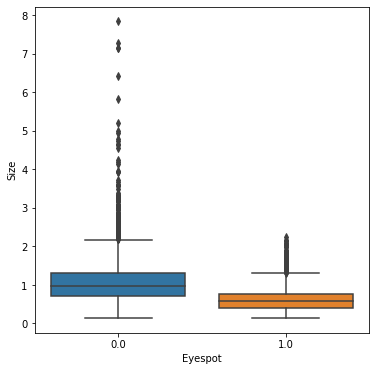

In [42]:
plt.figure(figsize=(6,6))
sns.boxplot('Eyespot', 'Size', data=MSC)
plt.show()

To calculate the average size of spat with and without and eyespot, we first created two separate datasets. One with just spat without an eyespot and one with just spat with an eyespot.

In [43]:
#Filtering the dataframe based on spat without an eyespot
no_eyespot =  MSC['Eyespot']==0
print(no_eyespot.head()) #looking at results as a boolean variable

0    False
1    False
2    False
3    False
4    False
Name: Eyespot, dtype: bool


In [44]:
MSC_no_eyespot = MSC[no_eyespot] #Filtering dataset using boolean variable 
print(MSC_no_eyespot.shape) #checking the size of the data frame 

(5373, 16)


In [45]:
for eye in np.unique(MSC_no_eyespot.Eyespot): #selecting the Eyespot column in the newly created dataset of just samples without an eyespot
    eye_data = MSC_no_eyespot.loc[MSC_no_eyespot['Eyespot'] == eye]
    avg_noeye_size = np.mean(eye_data.Size) #calculating the average size of spat without an eyespot
    
avg_noeye_size

1.0764449235064304

The average size of spat without an eyespot is about 1.076 mm.

In [46]:
#Filtering the dataframe based on spat with an eyespot
eyespot =  MSC['Eyespot']==1
print(eyespot.head()) #looking at results as a boolean variable

0    True
1    True
2    True
3    True
4    True
Name: Eyespot, dtype: bool


In [47]:
MSC_eyespot = MSC[eyespot] #Filtering dataset using boolean variable 
print(MSC_eyespot.shape) #checking the size of the data frame 

(3346, 16)


In [48]:
for eye in np.unique(MSC_eyespot.Eyespot): #selecting the Eyespot column in the newly created dataset of just samples with an eyespot
    eye_data = MSC_eyespot.loc[MSC_eyespot['Eyespot'] == eye]
    avg_eye_size = np.mean(eye_data.Size) #calculating the average size of spat with an eyespot
    
avg_eye_size

0.6288209922295281

The average spat size with an eyespot is about 0.629 mm. 

We then ran a t-test to test if we reject or fail to reject our null hypothesis:

Null: There is no significant difference in average size between spat with an eyespot and spat without an eyespot.


Steps to run the t-test come from: [Amulya Aankul](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f).

First, we calculate the standard deviation. To get the standard deviation, we must first calculate the variance in size data for both the dataset of spat without an eyespot and spat with an eyespot. Standard deviation is then calculated as the square root of variance_a (size of spat without an eyespot) + variance_b (size of spat with an eyespot) divided by 2. The t-statistics are then calculated subtracting the average size of spat with an eyespot from the average size of spat without an eyespot and dividing that value by the standard deviation * square root of 2 divided by the sample size (8719). We then calculated the degrees of freedom as 2 times the sample size minus 2. The p-value is then calculated using the t-statistics and degrees of freedom. 

In [49]:
## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = MSC_no_eyespot.Size.var(ddof=1)
var_b = MSC_eyespot.Size.var(ddof=1)

In [50]:
#std deviation
s = np.sqrt((var_a + var_b)/2)
s

0.45624176965480556

In [51]:
## Calculate the t-statistics
t = (MSC_no_eyespot.Size.mean() - MSC_eyespot.Size.mean())/(s*np.sqrt(2/8719))

In [52]:
## Compare with the critical t-value
#Degrees of freedom
df = 8719 - 2

In [53]:
#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

In [54]:
print("t = " + str(t))
print("p = " + str(p))

t = 64.77935135101025
p = 0.0


In [55]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(MSC_no_eyespot.Size, MSC_eyespot.Size)
print("t = " + str(t2))
print("p = " + str(p2))

t = 41.78001686416939
p = 0.0


In [56]:
stats.ttest_ind(MSC_no_eyespot.Size, MSC_eyespot.Size)

Ttest_indResult(statistic=41.78001686416939, pvalue=0.0)

I am hesitant to trust the results of the t-test because the p-value is zero. However, interpreting (with a lump of salt): we reject the null hypothesis as there is a significant difference in spat size between those without an eyespot and those with an eyespot (p-value < 0.05 (p = 0.0)). 

Spat likely lose their eyespot somewhere between 0.6 mm and ~1 mm typically. However, there are cases where some spat lose their eyespot sooner or later. 